In [1]:
# @title Import Libraries
import sys
import glob, os
import cv2
import numpy as np
import pandas as pd
import geopy.distance
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure
from skimage import feature
import skimage.measure


2025-01-13 14:33:52.226546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 14:33:53.151429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdjkhosh/.local/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2025-01-13 14:33:53.151532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdjkhosh/.local/lib/python3.10/sit

In [2]:
# Setup paths and import local libraries
%cd ../../

prj_path = Path('SkyAI-Sim')
sys.path.insert(0, str(prj_path))
from src.utils import img_helper
from src.utils.io_helper import str_to_floats
from src.utils import consts
from src.data.skyai import SkyAI
from src.utils import io_helper


/home/sdjkhosh/Projects/SkyAI-Sim


usage: SkyAI Sim Project [-h] [--coords COORDS] [--fov FOV]
                         [--aspect_ratio ASPECT_RATIO [ASPECT_RATIO ...]]
                         [--map_type {satellite,roadmap,terrain}]
                         [--dataset {SkyAI,VBN}] [--data_dir DATA_DIR]
                         [--img_size IMG_SIZE [IMG_SIZE ...]]
                         [--overlap OVERLAP] [--batch_size BATCH_SIZE]
                         [--seed SEED]
SkyAI Sim Project: error: argument --fov: invalid float value: '/home/sdjkhosh/.local/share/jupyter/runtime/kernel-v3d35587dc9949f274c3f84a2b0e9ce8924e3bb051.json'


In [17]:
args = consts.ARGS
args.dataset = 'VBN'
args.data_dir = '/home/sdjkhosh/Datasets/orges_augmented/For Parisa/Images/0-500'
args

Namespace(coords=[35.19, -89.94, 35.11, -89.8, 120.0], fov=78.8, aspect_ratio=[4, 3], map_type='roadmap', dataset='VBN', data_dir='/home/sdjkhosh/Datasets/orges_augmented/For Parisa/Images/0-500', img_size=[400, 400, 3], overlap=0.6, batch_size=8, seed=2024)

In [18]:

aerial_data = io_helper.import_module('data',
                         args.dataset,
                         args=args,
                         data_dir = args.data_dir)

aerial_data.config()



source: <src.data.vbn.VBN object at 0x7fb0ad43c7c0>

--------------------------------------------------------

Number of images in the path: 0

--------------------------------------------------------
source: <src.data.vbn.VBN object at 0x7fb0ad43c7c0>

---------------------------------------------------------------------------

Number of texts in the path: 2505 
First metadata sample:
                                                                                           0
fileType                                                                               BGRA
sensorName                                                            Alvium_U511m512_50deg
fovH                                                                              50.000000
fovV                                                                              50.000000
numPixH                                                                                 512
numPixV                                                   

/home/sdjkhosh/Datasets/orges_augmented/For Parisa/Images/0-500
2505
3


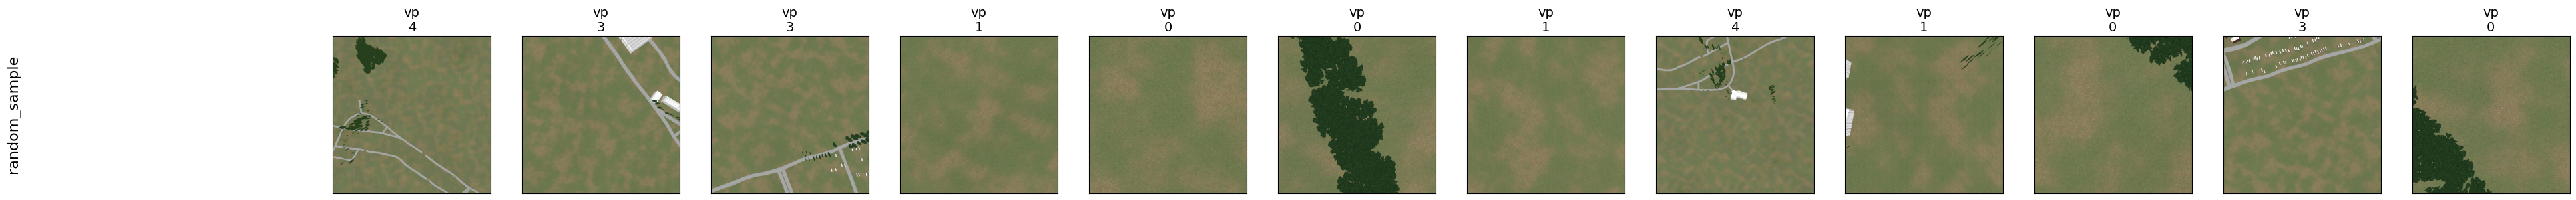

In [19]:
nx, ny = 3, 4
print(aerial_data.data_dir)
aerial_imgs_path = glob.glob(os.path.join(aerial_data.data_dir, "*.png"))
aerial_imgs_path.sort()
print(len(aerial_imgs_path))
aerial_imgs, aerial_titles = img_helper.choose_random_images(nx*ny,
                                                            aerial_imgs_path,
                                                            output_dir=aerial_data.data_dir / 'random_sample',
                                                            obj=aerial_data,
                                                            seed=args.seed)

3


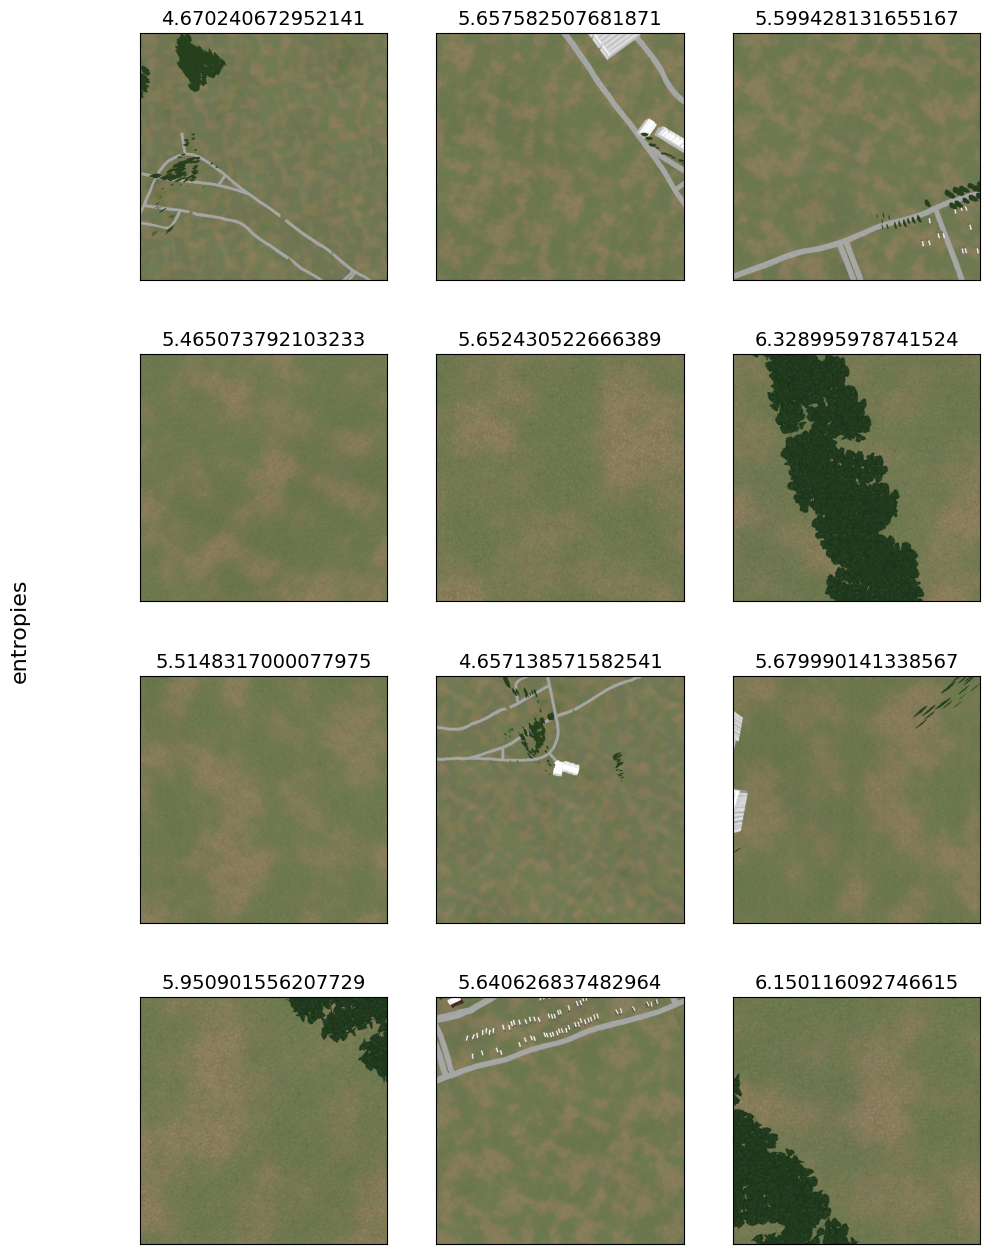

In [20]:
import skimage.measure
entropys = [skimage.measure.shannon_entropy(img) for img in aerial_imgs]

img_helper.plot_multy(aerial_imgs, aerial_data.data_dir /'entropies', nx, ny, entropys)

In [25]:
type(aerial_imgs[0])
aerial_imgs = [aerial_img.numpy() for aerial_img in aerial_imgs]
type(aerial_imgs[0])



numpy.ndarray

2


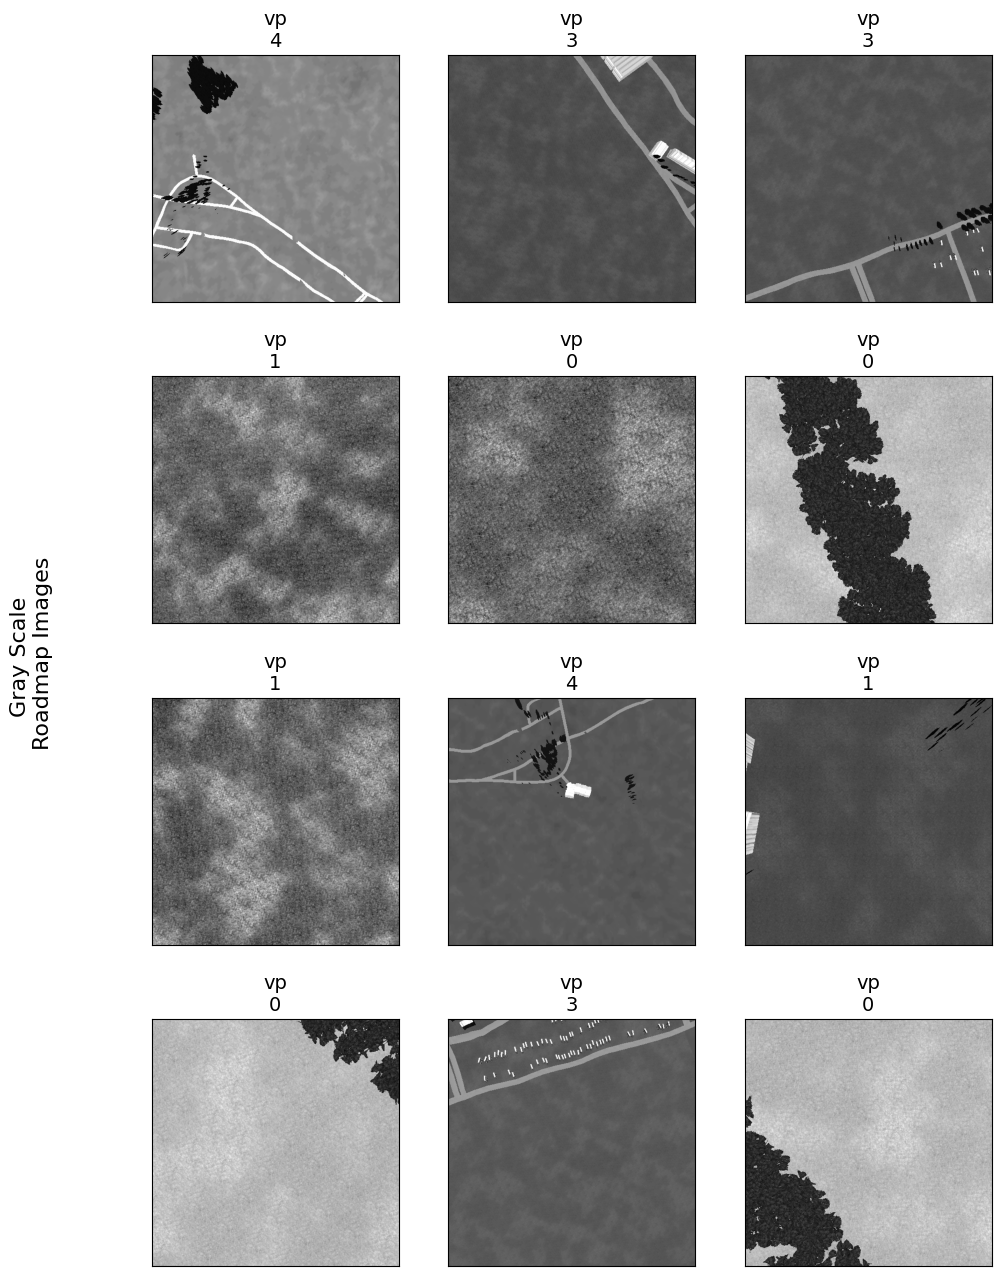

In [26]:
road_n = [cv2.normalize(img, None, alpha = 0, beta = 255,
                       norm_type = cv2.NORM_MINMAX,
                       dtype = cv2.CV_32F).astype('uint8') for img in aerial_imgs]
road_gray = [cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY) for real_img in road_n]
img_helper.plot_multy(road_gray, '../Gray Scale \nRoadmap Images', nx, ny, aerial_titles)

2


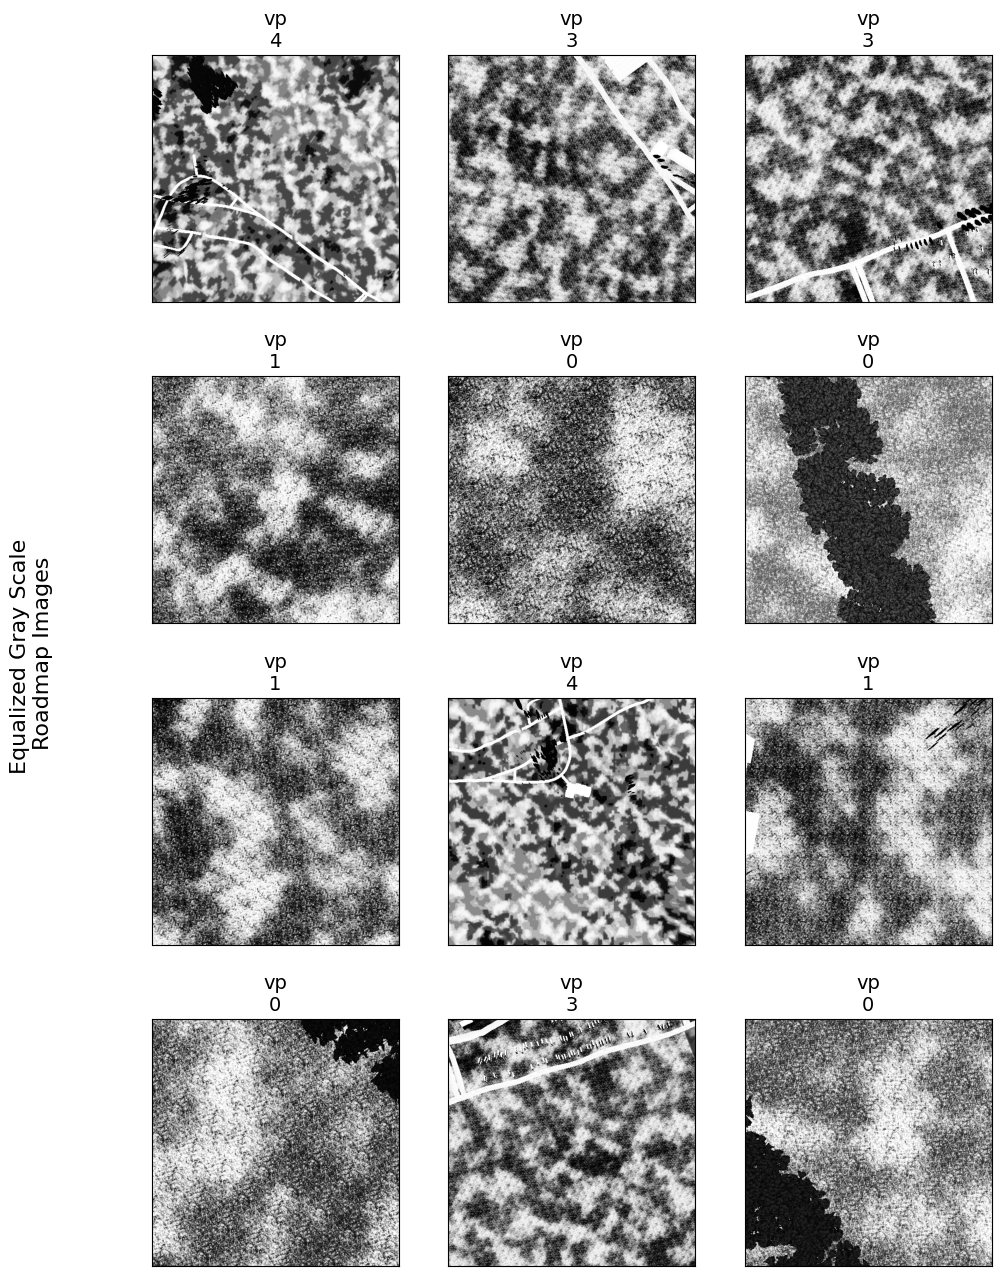

In [27]:

road_eq = [cv2.equalizeHist(img) for img in road_gray]
img_helper.plot_multy(road_eq, '../Equalized Gray Scale \nRoadmap Images', nx, ny, aerial_titles)

3


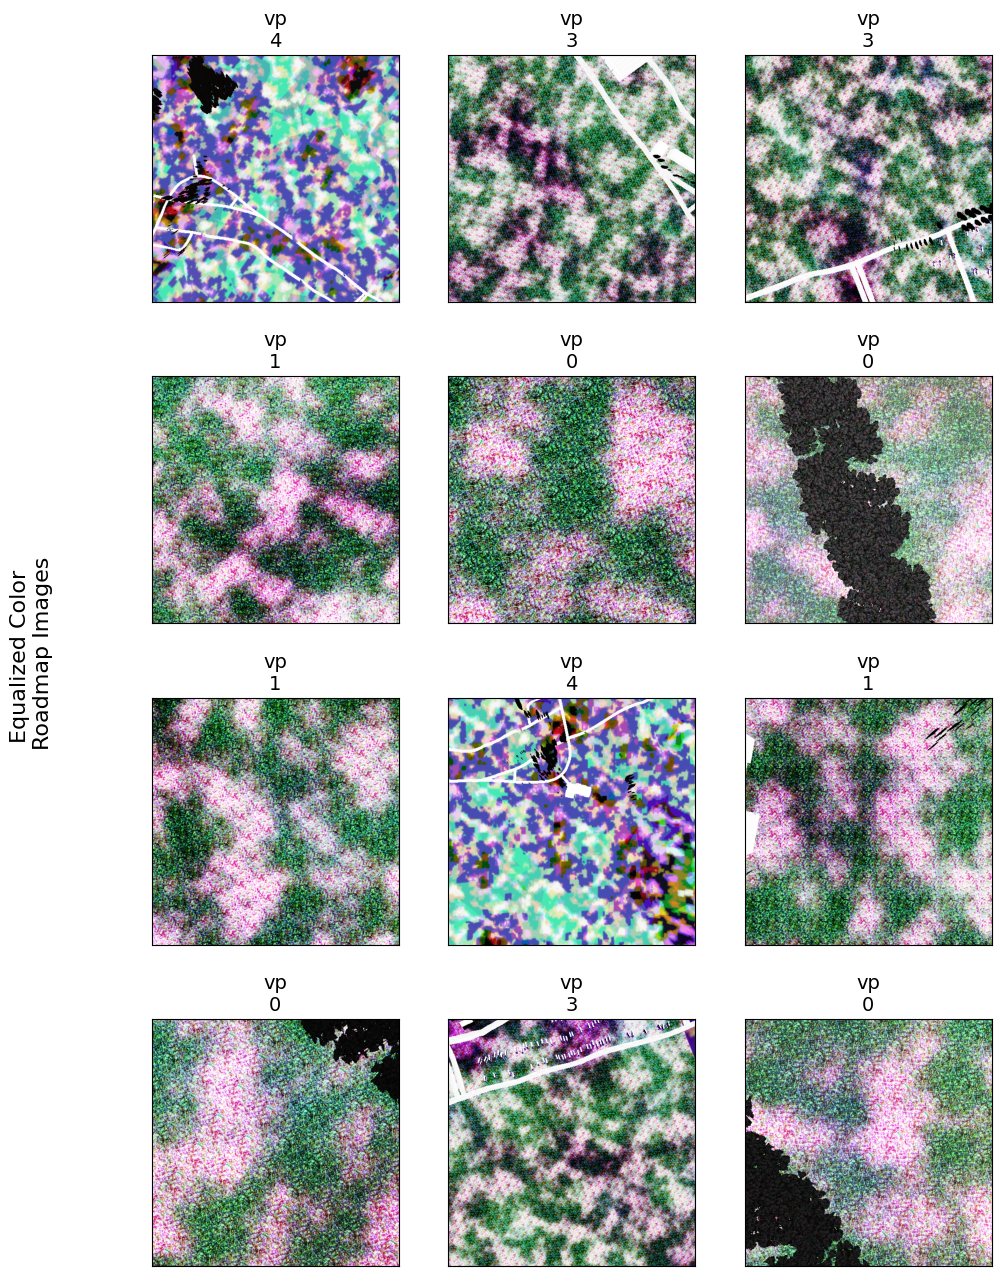

In [28]:
# equalize each color channel
eq_color = [cv2.merge([cv2.equalizeHist(channel) for channel in cv2.split(img)]) for img in road_n]
img_helper.plot_multy(eq_color, '../Equalized Color \nRoadmap Images', nx, ny, aerial_titles)